## Check For GPU


In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-d2cafb9f-ba95-2c12-5d6d-7bd097812a74)


## Get helper functions.

In [ ]:
!wget https://raw.githubusercontent.com/nish16111/DeepLearning_TensorFlow/main/reused_functions.py

--2023-02-05 13:19:52--  https://raw.githubusercontent.com/nish16111/DeepLearning_TensorFlow/main/reused_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8655 (8.5K) [text/plain]
Saving to: ‘reused_functions.py’

reused_functions.py 100%[===================>]   8.45K  --.-KB/s    in 0s      

2023-02-05 13:19:52 (104 MB/s) - ‘reused_functions.py’ saved [8655/8655]



In [ ]:
# Import series of functions.
from reused_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

## Get a text data-set.

The dataset going to be used is Kaggle's intorduction to NLP dataset (text samples of Tweets labelled as disaster or not disaster).

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2023-02-05 13:19:56--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.111.128, 142.251.163.128, 142.251.16.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2023-02-05 13:19:56 (99.1 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
# Unzip the data.
unzip_data("nlp_getting_started.zip")

## Visualizing the text data set.

In [ ]:
import pandas as pd
df_test = pd.read_csv("/content/test.csv")
len(df_test)

3263

In [ ]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
df_train = pd.read_csv("/content/train.csv")
len(df_train)

7613

In [ ]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
df_train["text"][1]

'Forest fire near La Ronge Sask. Canada'

In [ ]:
# Shuffle training data-set.
df_train_shuffled = df_train.sample(frac=1, random_state=42)
df_train_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
# Number of examples of each class (0/1 i.e. disaster or not)
df_train.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
len(df_train)+len(df_test)

10876

In [ ]:
# Visualize some random training samples.
import random 
random_index = random.randint(0, len(df_train) - 5) # create random images not higher than the total number of training samples
for row in df_train_shuffled[["text", "target"]][random_index:random_index + 5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "{real disaster}" if target > 0 else "{not a real disaster}")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 0 {not a real disaster}
Text:
What's going on in Hollywood? #abc7eyewitness @ABC7 helicopters and sirens. #HometownGlory

---

Target: 1 {real disaster}
Text:
Kids Disappear in Dust Storm in Atmospheric Aussie Thriller http://t.co/TPOaprJudp RT @Newz_Sacramento

---

Target: 0 {not a real disaster}
Text:
@MzMandiLynn GM! I pray any attack of the enemy 2 derail ur destiny is blocked by the Lord &amp; that He floods ur life w/heavenly Blessings

---

Target: 1 {real disaster}
Text:
Two giant cranes holding a bridge collapse into nearby homes http://t.co/q5q1x5Vcqk

---

Target: 1 {real disaster}
Text:
Nine inmates charged with causing damage in Calgary Remand Centre riot - http://t.co/1OSmIUXKhW

---



### Split data into training and validation sets


* `Training Set`: For training of the model. 
* `Validation Set`: For unbiased evaluation of the model. 
* `Test Set`: For final evaluation of the model.

* `Validation set`: A set of examples used to tune the parameters of a classifier, for example to choose the number of hidden units in a neural network.
* `Test set`: A set of examples used only to assess the performance of a fully-specified classifier.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Use train_test_split to split training data into train and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(df_train_shuffled["text"].to_numpy(), #sklearn expects data to be in the format of numpy arrays.
                                                                            df_train_shuffled["target"].to_numpy(),
                                                                            test_size= 0.1, #10% data for cv. 
                                                                            random_state= 42) 

In [ ]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

## Converting text into numbers

Ways to convert text to numbers:
1. Tokenization 
2. Embedding

* Embedding - create a feature vector for each token (the size of the faeature vector can be defined and this embedding can be learned)
* Tokenization - Straight mapping from token to number (can be modelled but quickly gets too quick)

### Text vectorization (tokenization)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Using default text vectorization params.

text_vectorizer = TextVectorization(max_tokens = None, # describes how many different words are there in the vocabulary. (automatically add <OOV> means out of vocabulary) setting this param to None means let the TextVectorization class itself decide the number of different words.
                                    standardize = "lower_and_strip_punctuation",
                                    split = "whitespace",
                                    ngrams = None, #create group of n-words.
                                    output_mode = "int", # how to map tokens to numbers.
                                    output_sequence_length = None, # how long do you want your sequences to be (like batches)
                                    pad_to_max_tokens = False) 


In [ ]:
len(train_sentences[0].split())

7

In [ ]:
# Find the average number of tokens (words) in the training tweets
round(sum([len(i.split()) for i in train_sentences]) / len(train_sentences))

15

In [ ]:
# Setup Textvectorization variables
max_vocab_length = 10000 # max number of (different) words to have in the vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does a model see)

text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                    output_mode = "int",
                                    output_sequence_length = max_length)

## Check For GPU


In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-d2cafb9f-ba95-2c12-5d6d-7bd097812a74)


## Get helper functions.

In [ ]:
!wget https://raw.githubusercontent.com/nish16111/DeepLearning_TensorFlow/main/reused_functions.py

--2023-02-05 13:19:59--  https://raw.githubusercontent.com/nish16111/DeepLearning_TensorFlow/main/reused_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8655 (8.5K) [text/plain]
Saving to: ‘reused_functions.py.1’

reused_functions.py 100%[===================>]   8.45K  --.-KB/s    in 0s      

2023-02-05 13:19:59 (100 MB/s) - ‘reused_functions.py.1’ saved [8655/8655]



In [ ]:
# Import series of functions.
from reused_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

## Get a text data-set.

The dataset going to be used is Kaggle's intorduction to NLP dataset (text samples of Tweets labelled as disaster or not disaster).

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2023-02-05 13:19:59--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.111.128, 142.251.163.128, 142.251.16.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip.1’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.007s  

2023-02-05 13:19:59 (88.7 MB/s) - ‘nlp_getting_started.zip.1’ saved [607343/607343]



In [ ]:
# Unzip the data.
unzip_data("nlp_getting_started.zip")

## Visualizing the text data set.

In [ ]:
import pandas as pd
df_test = pd.read_csv("/content/test.csv")
len(df_test)

3263

In [ ]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
df_train = pd.read_csv("/content/train.csv")
len(df_train)

7613

In [ ]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
df_train["text"][1]

'Forest fire near La Ronge Sask. Canada'

In [ ]:
# Shuffle training data-set.
df_train_shuffled = df_train.sample(frac=1, random_state=42)
df_train_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
# Number of examples of each class (0/1 i.e. disaster or not)
df_train.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
len(df_train)+len(df_test)

10876

In [ ]:
# Visualize some random training samples.
import random 
random_index = random.randint(0, len(df_train) - 5) # create random images not higher than the total number of training samples
for row in df_train_shuffled[["text", "target"]][random_index:random_index + 5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "{real disaster}" if target > 0 else "{not a real disaster}")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 0 {not a real disaster}
Text:
New cocktail on the list! El Diablo Mas Verde: mezcal yellow chartreuse honey cucumber hellfire bitters.... http://t.co/REuosJEK4m

---

Target: 1 {real disaster}
Text:
Bend Post Office roofers cut gas line prompt evacuation - http://t.co/6mF7eyZOAw

---

Target: 1 {real disaster}
Text:
Monsoon flooding - Monsoon rains have have hit India Pakistan and Myanmar hard this season. Two trains collided ... http://t.co/A7zF6N7vrL

---

Target: 1 {real disaster}
Text:
Remember this was a massacre of civilians. #Hiroshima http://t.co/qw8qk165Sb

---

Target: 1 {real disaster}
Text:
I liked a @YouTube video http://t.co/itnKBxgWLH Lexi Belle for Oklahoma tornado victims

---



### Split data into training and validation sets


* `Training Set`: For training of the model. 
* `Validation Set`: For unbiased evaluation of the model. 
* `Test Set`: For final evaluation of the model.

* `Validation set`: A set of examples used to tune the parameters of a classifier, for example to choose the number of hidden units in a neural network.
* `Test set`: A set of examples used only to assess the performance of a fully-specified classifier.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Use train_test_split to split training data into train and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(df_train_shuffled["text"].to_numpy(), #sklearn expects data to be in the format of numpy arrays.
                                                                            df_train_shuffled["target"].to_numpy(),
                                                                            test_size= 0.1, #10% data for cv. 
                                                                            random_state= 42) 

In [ ]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

## Converting text into numbers

Ways to convert text to numbers:
1. Tokenization 
2. Embedding

* Embedding - create a feature vector for each token (the size of the faeature vector can be defined and this embedding can be learned)
* Tokenization - Straight mapping from token to number (can be modelled but quickly gets too quick)

### Text vectorization (tokenization)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Using default text vectorization params.

text_vectorizer = TextVectorization(max_tokens = None, # describes how many different words are there in the vocabulary. (automatically add <OOV> means out of vocabulary) setting this param to None means let the TextVectorization class itself decide the number of different words.
                                    standardize = "lower_and_strip_punctuation",
                                    split = "whitespace",
                                    ngrams = None, #create group of n-words.
                                    output_mode = "int", # how to map tokens to numbers.
                                    output_sequence_length = None, # how long do you want your sequences to be (like batches)
                                    pad_to_max_tokens = False) 


In [ ]:
len(train_sentences[0].split())

7

In [ ]:
# Find the average number of tokens (words) in the training tweets
round(sum([len(i.split()) for i in train_sentences]) / len(train_sentences))

15

In [ ]:
# Setup Textvectorization variables
max_vocab_length = 10000 # max number of (different) words to have in the vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does a model see)

text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                    output_mode = "int",
                                    output_sequence_length = max_length)

In [ ]:
# Fit the text vectorizer to the training text.
# Adapt method is used to apply the preprocessing layer to the training samples.
text_vectorizer.adapt(train_sentences)

In [ ]:
# Create a sample sentence and tokenize it.
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# Choose a random sentence from the training dataset and tokenize it.
import random as rand
random_sentence = random.choice(train_sentences)

text_vectorizer([random_sentence]), random_sentence

(<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
 array([[   1, 8312,   55,    3,   75,   98,  132,   32, 2274,    0,    0,
            0,    0,    0,    0]])>,
 "@cncpts @SOLELINKS what a disaster - can't say I'm surprised")

In [ ]:
# Get the unique words in the vocab
words_in_the_vocab = text_vectorizer.get_vocabulary() # get all of the unique words in the training sample.
top_5_words = words_in_the_vocab[:5] #get the most common words
bottom_5_words = words_in_the_vocab[-5:] #get the least common words
top_5_words, bottom_5_words

(['', '[UNK]', 'the', 'a', 'in'],
 ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1'])

In [ ]:
len(words_in_the_vocab)

10000

### Creating an Embedding using an embedding layer.

The params most imp are: 
* `input_dim` = the size of the vocabulary (how many different words are there in our vocabulary in this case input_dim is 10000).
* `output_dim` = the size of the output embedding vector, for example, a value of 100 would mean each token gets represented by a vector 100 long.
* `input_length` = length of sequences being passed to the embedding layer (15 in this case)

In [ ]:
embedding_layer = tf.keras.layers.Embedding(input_dim = max_vocab_length, # set input_shape.
                                            output_dim = 128, # output_Shape.
                                            embeddings_initializer = "uniform",
                                            input_length = max_length) # how long each input is.

In [ ]:
embedding_layer

In [ ]:
# Get another random sntence from the training set.
random_sentence = random.choice(train_sentences)

# Embed the random sentence (turn it into dense vectors of fixed size)
# sample_embed = text_vectorizer([random_sentence])
# embedding_layer(sample_embed), random_sentence

sample_embed = embedding_layer(text_vectorizer([random_sentence]))
print(f"Random Sentence is :\n\n{random_sentence}\n")
print(f"The ebedded vector represeantation is: \n")
sample_embed

Random Sentence is :

Meek Mill responds to DrakeÛªs OVO Fest set with wedgie threat http://t.co/qqSKYbARNg

The ebedded vector represeantation is: 



<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.01591337,  0.01515016,  0.0407396 , ...,  0.0066036 ,
         -0.01718912, -0.00929393],
        [-0.00654436,  0.04426013, -0.02413726, ..., -0.01291542,
         -0.02388129,  0.03396043],
        [ 0.03330641, -0.00777742, -0.03201576, ...,  0.03046728,
         -0.00247697,  0.03697014],
        ...,
        [ 0.03703629, -0.0091043 ,  0.04084668, ...,  0.01306298,
         -0.0438987 ,  0.04620821],
        [ 0.03703629, -0.0091043 ,  0.04084668, ...,  0.01306298,
         -0.0438987 ,  0.04620821],
        [ 0.03703629, -0.0091043 ,  0.04084668, ...,  0.01306298,
         -0.0438987 ,  0.04620821]]], dtype=float32)>

In [ ]:
# check out single token's embedding.
sample_embed[0][0], sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 0.01591337,  0.01515016,  0.0407396 ,  0.02368959,  0.0126409 ,
        -0.00158029,  0.03947169,  0.04280224,  0.01961568,  0.01702719,
        -0.04502032, -0.04451631,  0.0349536 ,  0.03149993, -0.02431122,
         0.03306339,  0.02882662,  0.04483852, -0.03556579,  0.02663499,
        -0.03924475, -0.01355033,  0.03720883,  0.00170742, -0.0353436 ,
         0.03451725, -0.03638894, -0.02418935, -0.04564236,  0.04352457,
        -0.01198746,  0.01661357,  0.04062835, -0.01772226,  0.02612678,
         0.01665844,  0.00902013,  0.01168487, -0.04016123,  0.03212274,
         0.03738545, -0.03592967, -0.03198244,  0.03539319, -0.025752  ,
        -0.00367532,  0.02289755, -0.0008718 , -0.04026426, -0.01822279,
         0.01726264, -0.04087486, -0.01272066, -0.02098309, -0.01029754,
         0.03481344, -0.01426614,  0.02922044,  0.01499477, -0.03197034,
         0.03380616, -0.041256  , -0.03416135, -0.01282035,  0.02854152,
  

* `Tokenization` = Converting text into numbers.
* `Embedding` = Taking the tokenized format (numerical format) of the text and converting that into dense vectors of fixed size.

## Modelling a text data set and running a series of experiments
* Model 0: Naive Bayes (baseline)
* Model 1: Feed-Forward neural network(Dense Model)
* Model 2: LSTM model (RNN)
* Model 3: GRU model (RNN)
* Model 4: Bidirectional-LSTM model (RNN)
* Model 5: 1D convolutional Neural Network
* Model 6: Tensorflow Hub Pretrained Feature Extractor (using transfer learning for NLP)
Model 7: Same as model 6 with 10% of training data.

Steps included : 
* Create a model
* Build a model
* Fit the model
* Evaluate the model

### Model 0: Creating a baseline model.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Evaluate the base line model
baseline_score = model_0.score(val_sentences, val_labels)
print(f"The baseline model achieves the accuracy of : {baseline_score * 100:.2f}%")

The baseline model achieves the accuracy of : 79.27%


In [ ]:
# make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

### Evaluation methods
* Precision - Higher precision leads to less false positives
* Recall - Higher recall leads to less false negatives
* F1-score - Combination of precision and recall
** y_true = true_labels
** y_pred = predicted_labels

In [ ]:
# Function to evaluate accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
# y_pred = baseline_preds
# y_true = val_labels

In [ ]:
def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall, f1-score of a 
  binary classification model.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100

  # Calculate model precision, recall and f1-score.
  model_precision, model_recall, model_f1score, _ = precision_recall_fscore_support(y_true, y_pred, average = "weighted")

  # print(f" model_accuracy = {model_accuracy}\n model_precision = {model_precision}\n model_recall = {model_recall}\n model_f1score = {model_f1score}")
  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                   "recall": model_recall,
                   "f1_score": model_f1score}
  return model_results

In [ ]:
baseline_results = calculate_results(y_true = val_labels,
                                     y_pred = baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1_score': 0.7862189758049549}

### Model_1: Feed Forward Neural Network(Dense Model)

In [ ]:
from reused_functions import create_tensorboard_callback

# Create a directory to save tensorboard logs
SAVE_DIR = "model_logs"

In [ ]:
# Build model with the functional api

import tensorflow as tf

inputs = tf.keras.layers.Input(shape = (1, ), dtype = tf.string) # inputs are 1-D strings

x = text_vectorizer(inputs) #turn the input texts into numbers

x = embedding_layer(x) #create an embedding of numberized inputs

x = tf.keras.layers.GlobalAveragePooling1D()(x) #condenses the feature vector for each token to one vector.

# x = tf.keras.layers.GlobalMaxPool1D()(x) #takes the max feature weights instead of averaging on them, significantly improved the model accuracy with comapred to average pooling layer 1D

outputs = tf.keras.layers.Dense(1, activation = "sigmoid")(x) #create output layer, want binary outputs hence using sigmoid activation function

model_1 = tf.keras.Model(inputs, outputs, name = "model_1_dense")


In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_3 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
model_1_history = model_1.fit(tf.expand_dims(train_sentences, axis = 1),
                              train_labels,
                              epochs = 10,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(dir_name = SAVE_DIR,
                                                                       experiment_name = "model_1_dense")])

saving TensorBoard log files to : model_logs/model_1_dense/20230205-132001
Epoch 1/10
215/215 [==============================] - 6s 9ms/step - loss: 0.6106 - accuracy: 0.6897 - val_loss: 0.5388 - val_accuracy: 0.7402
Epoch 2/10
215/215 [==============================] - 2s 8ms/step - loss: 0.4412 - accuracy: 0.8161 - val_loss: 0.4727 - val_accuracy: 0.7874
Epoch 3/10
215/215 [==============================] - 2s 8ms/step - loss: 0.3458 - accuracy: 0.8631 - val_loss: 0.4595 - val_accuracy: 0.7940
Epoch 4/10
215/215 [==============================] - 2s 7ms/step - loss: 0.2840 - accuracy: 0.8899 - val_loss: 0.4641 - val_accuracy: 0.7913
Epoch 5/10
215/215 [==============================] - 2s 10ms/step - loss: 0.2369 - accuracy: 0.9130 - val_loss: 0.4773 - val_accuracy: 0.7822
Epoch 6/10
215/215 [==============================] - 2s 9ms/step - loss: 0.2008 - accuracy: 0.9289 - val_loss: 0.5027 - val_accuracy: 0.7808
Epoch 7/10
215/215 [==============================] - 2s 8ms/step - loss

In [ ]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 5ms/step - loss: 0.6151 - accuracy: 0.7756


[0.6151278018951416, 0.7755905389785767]

In [ ]:
# Make some predictions and evaluate those
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

24/24 [==============================] - 0s 4ms/step


(762, 1)

In [ ]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_1_results = calculate_results(y_true = val_labels,
                                    y_pred = model_1_preds)
model_1_results

{'accuracy': 77.55905511811024,
 'precision': 0.775710931680431,
 'recall': 0.7755905511811023,
 'f1_score': 0.7745089775603933}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1_score': 0.7862189758049549}

In [ ]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

## Visualizing learned embeddings

In [ ]:
# Get the vocanulary from the text vectoriztion layer
words_in_vocab = text_vectorizer.get_vocabulary()
words_in_vocab[:10], len(words_in_vocab)

(['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'], 10000)

In [ ]:
# Model 1 summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_3 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Get the weight matrix of the embedding layer
# (these are the numerical represesntations of each token in our training data, which have been learned for -10 epochs)

embed_weights = model_1.get_layer("embedding").get_weights()[0]

print(embed_weights.shape) # same size as vocab size and embedding_dim (output_dim of our embedding layer)

# 10_000 sample data in embedding layer each of 128 in size.

(10000, 128)


In [ ]:
embed_weights

array([[ 0.04658851, -0.00818346,  0.03441945, ...,  0.00264654,
        -0.05440106,  0.05471789],
       [ 0.03607685, -0.04038783, -0.03017416, ..., -0.01300283,
         0.00862193,  0.00195208],
       [ 0.02584981,  0.02295366,  0.01629591, ..., -0.0067193 ,
         0.00039752,  0.02618053],
       ...,
       [-0.0449757 , -0.03289007, -0.03350655, ...,  0.04680238,
         0.00251472, -0.03775737],
       [ 0.06539411,  0.00118638, -0.02264206, ..., -0.07362515,
        -0.00557109,  0.07469676],
       [ 0.07100352,  0.14267221, -0.12426958, ..., -0.1075794 ,
        -0.0629986 ,  0.14823148]], dtype=float32)

In [ ]:
# Create embedding files
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [ ]:
# Download files from colab to upload to projector
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Recurrent Neural Networks (RNN's)
RNN's are useful for sequence/temporal data

The premise of a rnn is to use the representation of a previous input to aid the representation of a later input.

### Model 2: LSTM

LSTM : Long short term memory

```
Input (text) -> Tokenize -> Embedding -> Layers (RNN's/Dense) -> Output (label probability)
```

In [ ]:
# Create a lstm model
inputs = tf.keras.layers.Input(shape = (1, ), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding_layer(x)
# print(x.shape)
# x = tf.keras.layers.GlobalAveragePooling1D()(x)
# x = tf.keras.layers.LSTM(units = 64, return_sequences=True)(x) # when you are stacking RNN cells together, you need to set return_sequences= True
# print(x.shape)
x = tf.keras.layers.LSTM(64)(x)
# print(x.shape)
# x = tf.keras.layers.Dense(64, activation = "relu")(x)
# print(x.shape)
outputs = tf.keras.layers.Dense(1, activation = "sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name = "model_2_LSTM")


**Note** : A LSTM layer needs a 3-D Tensor (Batch, Timestep, features aka feature-vector) for the layer to build patterns.

In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_3 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

#### Tanh Activation Function:

**Note** 
* Tanh function is symmetric about the origin, where the inputs would be normalized and they are more likely to produce outputs (which are inputs to next layer) and also, they are on an average close to zero.

* It can also be said that data is centered around zero for tanh (centered around zero) is nothing but mean of the input data is around zero.

* These are the main reasons Why tanh is preferred and performs better than sigmoid (logistic).



In [ ]:
import numpy as np 
def tanh(z):
  return (tf.exp(z) - tf.exp(-z)) / (tf.exp(z) + tf.exp(-z))

In [ ]:
tanh(1.0)

<tf.Tensor: shape=(), dtype=float32, numpy=0.7615942>

In [ ]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

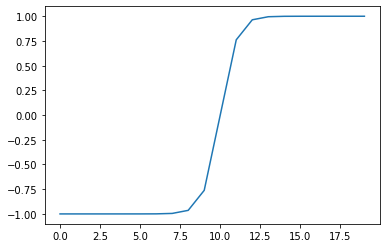

In [ ]:
import matplotlib.pyplot as plt
plt.plot(tanh(A))

In [ ]:
# Compile the model.
model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
# Fit the model.
model_2_history = model_2.fit(x = train_sentences,
                              y = train_labels,
                              validation_data = (val_sentences, val_labels),
                              epochs = 5,
                              callbacks = [create_tensorboard_callback(dir_name = SAVE_DIR,
                                                                       experiment_name = "model_2_LSTM")])

saving TensorBoard log files to : model_logs/model_2_LSTM/20230205-132028
Epoch 1/5
215/215 [==============================] - 7s 8ms/step - loss: 0.1467 - accuracy: 0.9518 - val_loss: 0.6808 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0890 - accuracy: 0.9669 - val_loss: 0.7478 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0783 - accuracy: 0.9691 - val_loss: 1.0228 - val_accuracy: 0.7769
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0713 - accuracy: 0.9724 - val_loss: 0.9404 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0610 - accuracy: 0.9745 - val_loss: 1.1177 - val_accuracy: 0.7651


In [ ]:
# Evaluate the model.
model_2.evaluate(val_sentences, val_labels)


24/24 [==============================] - 0s 3ms/step - loss: 1.1177 - accuracy: 0.7651


[1.1176539659500122, 0.7650918364524841]

In [ ]:
# Make predictions with lstm model
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape

24/24 [==============================] - 0s 3ms/step


(762, 1)

In [ ]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [ ]:
model_2_results = calculate_results(y_true = val_labels,
                                    y_pred = model_2_preds)
model_2_results, model_1_results

({'accuracy': 76.50918635170603,
  'precision': 0.7678247467805763,
  'recall': 0.7650918635170604,
  'f1_score': 0.7623298399088922},
 {'accuracy': 77.55905511811024,
  'precision': 0.775710931680431,
  'recall': 0.7755905511811023,
  'f1_score': 0.7745089775603933})

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1_score': 0.7862189758049549}

In [ ]:
np.array(list(model_2_results.values())) > np.array(list(model_1_results.values()))

array([False, False, False, False])

### Model_3: GRU (Gated recurrent Unit)

* The GRU cell has similar features to an LSTM cell but has less paremeters.

In [ ]:
inputs = tf.keras.Input(shape = (1, ), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding_layer(x)
x = tf.keras.layers.LSTM(64, return_sequences = True)(x)
x = tf.keras.layers.GRU(64)(x)
# x = tf.keras.layers.GRU(64)(x)
# x = tf.keras.layers.Dense(64, activation = "relu")(x)
# x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = tf.keras.layers.Dense(1, activation = "sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name = "model_3_GRU")

**Note** return_sequences = True (parameter) is must for the sequence layers (i.e. gru lstm ) as they expect a 3D tensor  

In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_3 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm_1 (LSTM)               (None, 15, 64)            49408     
                                                                 
 gru (GRU)                   (None, 64)                24960     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                       

In [ ]:
model_3.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
model_3_history = model_3.fit(x = train_sentences,
                              y = train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(dir_name = SAVE_DIR,
                                                                       experiment_name = "model_3_GRU")])

saving TensorBoard log files to : model_logs/model_3_GRU/20230205-132043
Epoch 1/5
215/215 [==============================] - 5s 10ms/step - loss: 0.1082 - accuracy: 0.9635 - val_loss: 0.9874 - val_accuracy: 0.7651
Epoch 2/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0575 - accuracy: 0.9758 - val_loss: 1.1143 - val_accuracy: 0.7690
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0514 - accuracy: 0.9787 - val_loss: 1.3825 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0450 - accuracy: 0.9804 - val_loss: 1.2501 - val_accuracy: 0.7585
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0453 - accuracy: 0.9796 - val_loss: 1.4019 - val_accuracy: 0.7664


In [ ]:
model_3.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 4ms/step - loss: 1.4019 - accuracy: 0.7664


[1.4018546342849731, 0.7664042115211487]

In [ ]:
model_3_pred_probs = model_3.predict(val_sentences)

24/24 [==============================] - 1s 3ms/step


In [ ]:
model_3_pred_probs.shape

(762, 1)

In [ ]:
model_3_pred_probs[:10]

array([[5.8385149e-02],
       [6.3838750e-01],
       [9.9977523e-01],
       [9.6187271e-02],
       [7.5261771e-05],
       [9.9975127e-01],
       [8.7242573e-01],
       [9.9994779e-01],
       [9.9992275e-01],
       [9.9658799e-01]], dtype=float32)

In [ ]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_3_results = calculate_results(y_true = val_labels,
                                    y_pred = model_3_preds)

In [ ]:
model_3_results

{'accuracy': 76.64041994750657,
 'precision': 0.7662606650453277,
 'recall': 0.7664041994750657,
 'f1_score': 0.7654276516145048}

### Model 4: Bi-Directional LSTM model
Normal RNN's go from left to right (just like you'd read an english sentence) however, bidirectional rnn goes from right to left as well as left to right.

In [ ]:
inputs = tf.keras.Input(shape = (1, ), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding_layer(x)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True))(x)
print(x.shape)
x = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32))(x)
print(x.shape)
outputs = tf.keras.layers.Dense(1, activation = "sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name = "model_4_bi_directional")

(None, 15, 128)
(None, 64)


In [ ]:
model_4.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       "model_4_bi_directional")])

saving TensorBoard log files to : model_logs/model_4_bi_directional/20230205-132056
Epoch 1/5
215/215 [==============================] - 9s 19ms/step - loss: 0.0947 - accuracy: 0.9734 - val_loss: 1.0018 - val_accuracy: 0.7598
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0473 - accuracy: 0.9796 - val_loss: 1.0992 - val_accuracy: 0.7559
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0476 - accuracy: 0.9783 - val_loss: 1.1667 - val_accuracy: 0.7625
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0378 - accuracy: 0.9807 - val_loss: 1.5087 - val_accuracy: 0.7664
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0385 - accuracy: 0.9813 - val_loss: 1.3744 - val_accuracy: 0.7585


In [ ]:
model_4.summary()

Model: "model_4_bi_directional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_3 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 15, 128)          98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               31104     
 nal)                                                            
                                            

In [ ]:
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs.shape

24/24 [==============================] - 2s 5ms/step


(762, 1)

In [ ]:
model_4_pred_probs[:10]

array([[3.1524161e-03],
       [5.0691438e-01],
       [9.9982685e-01],
       [9.1401547e-02],
       [5.0467879e-05],
       [9.9876738e-01],
       [2.2174187e-02],
       [9.9995625e-01],
       [9.9993324e-01],
       [9.5222902e-01]], dtype=float32)

In [ ]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [ ]:
model_4_results = calculate_results(y_true = val_labels,
                                    y_pred = model_4_preds)
model_4_results

{'accuracy': 75.8530183727034,
 'precision': 0.7625739943565455,
 'recall': 0.7585301837270341,
 'f1_score': 0.7549664582215014}

## Convolution Neural Networks for Text (and other types of sequences)


Typical Structure of a Conv1D model for sequences (in this case, text):

```
Inputs (text) -> Tokenization -> Embedding -> Layer(s) (typically Conv1D + pooling) -> Outputs (class proabilities)
```

### Model 5: 1D Convolutional Neural Network.


In [ ]:
embedding_test = embedding_layer(text_vectorizer(["this is a test sentence"]))

conv_1D = tf.keras.layers.Conv1D(filters = 32,
                                 kernel_size = 3, # this is also refered to as an ngram of 3 (meaning it looks at 3 words at a time)
                                 activation = "relu",
                                 padding = "same") # default = "valid", the output is smaller than the input shape, "same" means output is same as input.

conv_1D_output = conv_1D(embedding_test)

max_pool_layer = tf.keras.layers.GlobalMaxPool1D()

max_pool_layer_output = max_pool_layer(conv_1D_output)

embedding_test.shape, conv_1D_output.shape, max_pool_layer_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 15, 32]), TensorShape([1, 32]))

In [ ]:
len(conv_1D_output), conv_1D_output

(1, <tf.Tensor: shape=(1, 15, 32), dtype=float32, numpy=
 array([[[0.08740772, 0.        , 0.03719439, 0.        , 0.08432423,
          0.0127591 , 0.        , 0.        , 0.02209131, 0.02007908,
          0.08208242, 0.01970738, 0.03772027, 0.        , 0.02771712,
          0.03126223, 0.        , 0.01916013, 0.        , 0.05702319,
          0.0035251 , 0.        , 0.01924777, 0.01431334, 0.        ,
          0.02777181, 0.03819716, 0.        , 0.05881085, 0.00573544,
          0.02512595, 0.        ],
         [0.        , 0.01036069, 0.        , 0.        , 0.03102858,
          0.        , 0.08052802, 0.        , 0.04485651, 0.01658775,
          0.0037969 , 0.        , 0.02673542, 0.01967768, 0.08036128,
          0.01036866, 0.01726789, 0.        , 0.0332002 , 0.04997066,
          0.        , 0.        , 0.        , 0.03312233, 0.0143086 ,
          0.        , 0.00918331, 0.        , 0.00202674, 0.0476577 ,
          0.03441587, 0.07196712],
         [0.05169566, 0.09348266,

In [ ]:
max_pool_layer_output

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.08740772, 0.09348266, 0.06411743, 0.04794182, 0.08432423,
        0.01951106, 0.08052802, 0.09416871, 0.08966932, 0.03644681,
        0.08282498, 0.03973769, 0.04187647, 0.03357162, 0.08036128,
        0.11279681, 0.01726789, 0.01916013, 0.06143759, 0.05702319,
        0.0035251 , 0.03457084, 0.01924777, 0.04666272, 0.04989934,
        0.05167175, 0.06070815, 0.00303708, 0.05881085, 0.0476577 ,
        0.08064508, 0.07196712]], dtype=float32)>

**Note** 
* kernel_size = 3 means the conv_1d layer looks at 3 words at a time.
* striding means to shift the index of learning of text.
* 

In [ ]:
inputs = tf.keras.Input(shape = (1, ), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding_layer(x)
x = tf.keras.layers.Conv1D(filters = 64, # 64 filters traversing over our text data.
                           kernel_size = 5,
                           activation = "relu")(x)
x = tf.keras.layers.GlobalMaxPool1D()(x)                           
outputs = tf.keras.layers.Dense(1, activation = "sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name = "model_5_Conv1D")

In [ ]:
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_3 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)              

In [ ]:
model_5.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(dir_name = SAVE_DIR,
                                                                       experiment_name = "model_5_Conv1D")])

saving TensorBoard log files to : model_logs/model_5_Conv1D/20230205-132127
Epoch 1/5
215/215 [==============================] - 4s 7ms/step - loss: 0.1076 - accuracy: 0.9667 - val_loss: 0.9754 - val_accuracy: 0.7638
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0673 - accuracy: 0.9753 - val_loss: 1.0631 - val_accuracy: 0.7546
Epoch 3/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0569 - accuracy: 0.9755 - val_loss: 1.1487 - val_accuracy: 0.7546
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0519 - accuracy: 0.9777 - val_loss: 1.2498 - val_accuracy: 0.7585
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0493 - accuracy: 0.9785 - val_loss: 1.3365 - val_accuracy: 0.7572


In [ ]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10], model_5_pred_probs.shape

24/24 [==============================] - 0s 2ms/step


(array([[6.9098860e-01],
        [4.5341009e-01],
        [9.9973017e-01],
        [2.6070522e-02],
        [2.6990879e-08],
        [8.0305547e-01],
        [9.4738680e-01],
        [9.9989653e-01],
        [9.9999917e-01],
        [7.7989995e-01]], dtype=float32), (762, 1))

In [ ]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_5_results = calculate_results(y_true = val_labels,
                                    y_pred = model_5_preds)

In [ ]:
model_5_results

{'accuracy': 75.7217847769029,
 'precision': 0.7617891337172868,
 'recall': 0.7572178477690289,
 'f1_score': 0.7533748554187873}

## Model 6: TensorFlow Hub pretrained Sentence Encoder

In [ ]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embeddings_sample = embed(["I Love Physics",
                           "Particularly I like QM the most"])
print(embeddings_sample[0][:50])

tf.Tensor(
[ 0.02173184 -0.05458002 -0.01145136  0.00071234  0.06750362 -0.02798224
 -0.0046751   0.00660061  0.031262    0.05861112  0.03101636 -0.07539539
  0.04188965  0.07185057  0.01008568 -0.05159967  0.00610975  0.01749514
 -0.01897294 -0.09748923 -0.04524577 -0.02276232  0.05688573  0.05571006
 -0.02572985  0.01654387 -0.04330797 -0.01995574 -0.01593327 -0.06211963
 -0.06405291 -0.01840249  0.000142    0.01430484 -0.02535101  0.02695745
 -0.04590956  0.02542399 -0.0433749  -0.03667298 -0.00155148  0.07382147
 -0.01809932 -0.00401603 -0.05482544  0.02928685 -0.05661615  0.05964796
  0.0327573   0.01201433], shape=(50,), dtype=float32)


In [ ]:
embeddings_sample[0].shape

TensorShape([512])

In [ ]:
# Create a Keras Layer using USE the pre-trained layer from tensorflow_hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape = [], # input is blank as the module can take variable length english text
                                        dtype = tf.string,
                                        trainable = False,
                                        name = "USE")

**Note** The Universal Setenece Encoder does'nt need the text_vectorizer layer (which i have built) it automatically takes care of the tokenization.

In [ ]:
# Create a model using a Sequential Api
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    tf.keras.layers.Dense(64, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
], name = "model_6_USE")

# Compile
model_6.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])



In [ ]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs = 10,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       "model_6_USE")])

saving TensorBoard log files to : model_logs/model_6_USE/20230205-132157
Epoch 1/10
215/215 [==============================] - 5s 13ms/step - loss: 0.5081 - accuracy: 0.7757 - val_loss: 0.4460 - val_accuracy: 0.8045
Epoch 2/10
215/215 [==============================] - 3s 14ms/step - loss: 0.4137 - accuracy: 0.8162 - val_loss: 0.4340 - val_accuracy: 0.8123
Epoch 3/10
215/215 [==============================] - 3s 12ms/step - loss: 0.4005 - accuracy: 0.8210 - val_loss: 0.4290 - val_accuracy: 0.8110
Epoch 4/10
215/215 [==============================] - 3s 12ms/step - loss: 0.3917 - accuracy: 0.8251 - val_loss: 0.4281 - val_accuracy: 0.8071
Epoch 5/10
215/215 [==============================] - 2s 12ms/step - loss: 0.3844 - accuracy: 0.8298 - val_loss: 0.4236 - val_accuracy: 0.8189
Epoch 6/10
215/215 [==============================] - 3s 12ms/step - loss: 0.3778 - accuracy: 0.8335 - val_loss: 0.4242 - val_accuracy: 0.8189
Epoch 7/10
215/215 [==============================] - 3s 16ms/step - 

In [ ]:
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10], model_6_pred_probs.shape

24/24 [==============================] - 1s 15ms/step


(array([[0.17426796],
        [0.7629736 ],
        [0.9972953 ],
        [0.2440248 ],
        [0.7207754 ],
        [0.78850853],
        [0.99237883],
        [0.9924489 ],
        [0.9780702 ],
        [0.06592214]], dtype=float32), (762, 1))

In [ ]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_6_results = calculate_results(y_true = val_labels,
                                    y_pred = model_6_preds)
model_6_results

{'accuracy': 81.75853018372703,
 'precision': 0.8196403099324437,
 'recall': 0.8175853018372703,
 'f1_score': 0.8161793631328899}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1_score': 0.7862189758049549}

In [ ]:
len(df_train_shuffled)

7613

In [ ]:
len(df_test)

3263

## Model_7: TF Hub USE but with 10% of training data

Transfer learning really helps when u don't have a large datset.

Replicating model_6 with 10% of the datset.

In [ ]:
# Create subsets pf 10% of training_data
df_train_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


- train_10_percent is a dataFrame with 10% of the training samples.
- we have to convert the panda data series into lists which would be fed to our model_7.
- will do the same with test and validation data.

In [ ]:
# ## Note: Making data splits like below leads to data leakage (model_7 trained on 10 percent of data, outperforms model_6 trained on 100 percent of data)
# ## DO NOT MAKE DATA SPLITS WHICH LEAK DATA FROM VALIDATION/TEST SETS INTO TRAINING SET.

# train_10_percent = df_train_shuffled[["text", "target"]].sample(frac = 0.1, random_state = 42)
# train_10_percent.head()
# len(train_10_percent)
# train_10_percent_sentences = train_10_percent["text"].to_list()
# train_10_percent_labels = train_10_percent["target"].to_list()
# train_10_percent_sentences[:5], train_10_percent_labels[:5]

In [ ]:
# check the number of targets in our subsets of data
# train_10_percent["target"].value_counts() # dataframe with 10% train_samples

In [ ]:
# df_train_shuffled["target"].value_counts()

**Note:** Be *very* careful when creating training/val/test splits that you don't leak data across the datasets, otherwise your model evaluation metrics will be wrong. If something looks too good to be true (a model trained pn 10% of data outperforming the same model trained on a 100% of data) trust your gut and go back through to find the error may lie.

In [ ]:
# Making a better dataset split (no data leakage)
train_10_percent_split = int(0.1 * len(train_sentences))
train_10_percent_split
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]
len(train_labels_10_percent), len(train_sentences_10_percent)

(685, 685)

In [ ]:
train_sentences_10_percent[:10]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk',
       '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
       'destroy the free fandom honestly',
       'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
       '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
       'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
      dtype=object)

In [ ]:
train_labels_10_percent[:10]

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1])

In [ ]:
# check the number of each label in the updated training data subset.
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

To recrate a model the same as a previous model you've created ypu. can use the `tf.keras.models.clone_model()` method.

In [ ]:
model_7 = tf.keras.Sequential([
    sentence_encoder_layer,
    tf.keras.layers.Dense(64, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
], name = "model_7_USE_10_percent")

model_7.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_7.summary()

Model: "model_7_USE_10_percent"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs = 10,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       "model_7_USE_10_percent_correct_split")])

saving TensorBoard log files to : model_logs/model_7_USE_10_percent_correct_split/20230205-132241
Epoch 1/10
22/22 [==============================] - 2s 41ms/step - loss: 0.6658 - accuracy: 0.7139 - val_loss: 0.6450 - val_accuracy: 0.7480
Epoch 2/10
22/22 [==============================] - 1s 27ms/step - loss: 0.5921 - accuracy: 0.8044 - val_loss: 0.5851 - val_accuracy: 0.7612
Epoch 3/10
22/22 [==============================] - 1s 26ms/step - loss: 0.5148 - accuracy: 0.8190 - val_loss: 0.5317 - val_accuracy: 0.7690
Epoch 4/10
22/22 [==============================] - 1s 26ms/step - loss: 0.4568 - accuracy: 0.8146 - val_loss: 0.5009 - val_accuracy: 0.7769
Epoch 5/10
22/22 [==============================] - 1s 26ms/step - loss: 0.4164 - accuracy: 0.8321 - val_loss: 0.4896 - val_accuracy: 0.7769
Epoch 6/10
22/22 [==============================] - 1s 24ms/step - loss: 0.3893 - accuracy: 0.8394 - val_loss: 0.4848 - val_accuracy: 0.7795
Epoch 7/10
22/22 [==============================] - 1s 2

In [ ]:
model_7_pred_probs = model_7.predict(val_sentences)

24/24 [==============================] - 0s 9ms/step


In [ ]:
model_7_pred_probs[:10]

array([[0.07128258],
       [0.51729155],
       [0.978516  ],
       [0.3847539 ],
       [0.5416118 ],
       [0.6280185 ],
       [0.97060466],
       [0.8958816 ],
       [0.93247163],
       [0.13011114]], dtype=float32)

In [ ]:
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_7_results = calculate_results(y_true = val_labels,
                                    y_pred = model_7_preds)

In [ ]:
model_7_results

{'accuracy': 77.16535433070865,
 'precision': 0.7717840407633899,
 'recall': 0.7716535433070866,
 'f1_score': 0.7705026760144871}

In [ ]:
model_6_results

{'accuracy': 81.75853018372703,
 'precision': 0.8196403099324437,
 'recall': 0.8175853018372703,
 'f1_score': 0.8161793631328899}

## Comparing the performance of each our models.

In [ ]:
# combine model reults into a dataframe
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "1_simple_dense": model_1_results,
                                  "2_LSTM": model_2_results,
                                  "3_GRU": model_3_results,
                                  "4_bidirectional_LSTM": model_4_results,
                                  "5_1D_Conv": model_5_results,
                                  "6_transferLearning": model_6_results,
                                  "7_10_percent_transferLearning": model_7_results})
all_model_results = all_model_results.transpose()

In [ ]:
# Reduce the accuracy to same scale as other metircs
all_model_results["accuracy"] = all_model_results["accuracy"]/100
all_model_results

,accuracy,precision,recall,f1_score
baseline,0.792651,0.811139,0.792651,0.786219
1_simple_dense,0.775591,0.775711,0.775591,0.774509
2_LSTM,0.765092,0.767825,0.765092,0.762330
3_GRU,0.766404,0.766261,0.766404,0.765428
4_bidirectional_LSTM,0.758530,0.762574,0.758530,0.754966
5_1D_Conv,0.757218,0.761789,0.757218,0.753375
6_transferLearning,0.817585,0.819640,0.817585,0.816179
7_10_percent_transferLearning,0.771654,0.771784,0.771654,0.770503


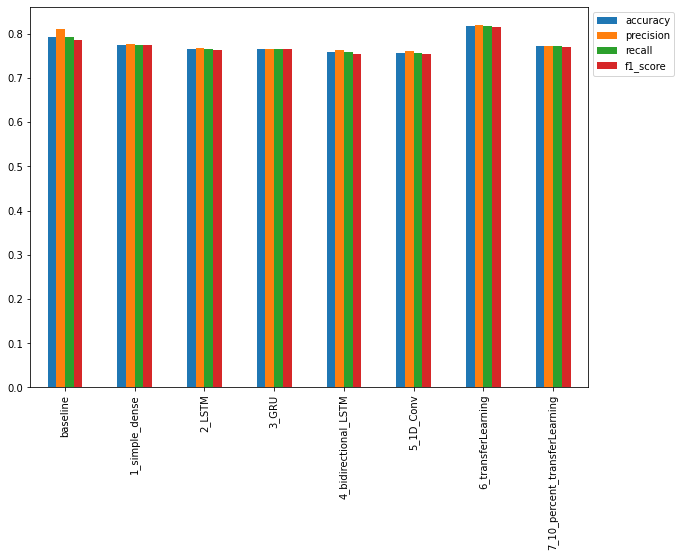

In [ ]:
# plt and compare all model results
all_model_results.plot(kind = "bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

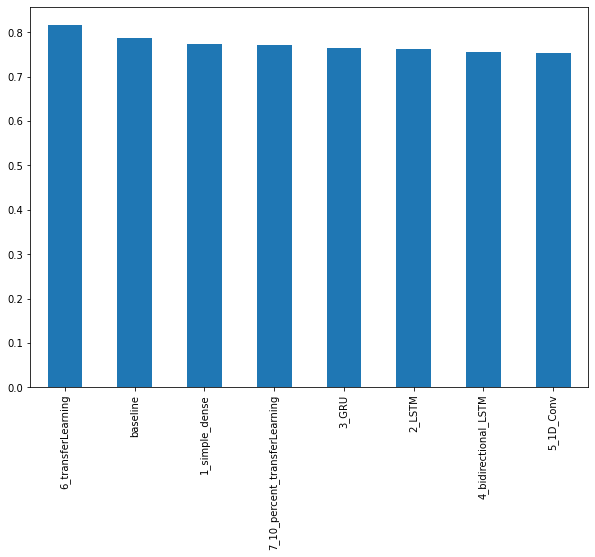

In [ ]:
# Sort model results by f-1 score
all_model_results.sort_values("f1_score", ascending = False)["f1_score"].plot(kind = "bar", figsize = (10,7))

## Uploading model training logs to TensorBoard.dev

In [ ]:
!tensorboard dev upload --logdir ./model_logs \
  --name "NLP_different_model_comparisons" \
  --description "Various deep learning models compared to the tf-idf baseline model" \
  --one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) NO


In [ ]:
!tensorboard dev list


***** TensorBoard Uploader *****

This will list all experiments that you've uploaded to
https://tensorboard.dev. TensorBoard.dev experiments are visible
to everyone. Do not upload sensitive data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) 

## Saving and loading a trained model
There are 2 main formats to save model in tf
1. The HDF5 format
2. The `SavedModel` format (this is the default when using TensorFLow)

In [ ]:
# Save TF Hub Sentence Encoder model to HDF5 format
model_6.save("model_6.h5")

In [ ]:
# Load model with custom hub layer. (required with HDF5 format)
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects = {"KerasLayer": hub.KerasLayer})

In [ ]:
# How does the loaded model perform
loaded_model_6.evaluate(val_sentences, 
                        val_labels)

24/24 [==============================] - 1s 10ms/step - loss: 0.4235 - accuracy: 0.8176


[0.42349231243133545, 0.817585289478302]

In [ ]:
model_6_results

{'accuracy': 81.75853018372703,
 'precision': 0.8196403099324437,
 'recall': 0.8175853018372703,
 'f1_score': 0.8161793631328899}

Save the model using `SavedModel` format

In [ ]:
# Save TF Hub sentence Encoder model to SavedModel format (default)
model_6.save("model_6_SavedModel_format")

In [ ]:
# Load in the model from savedModel format
loaded_model_6_Savedodel_format = tf.keras.models.load_model("model_6_SavedModel_format")
loaded_model_6_Savedodel_format

In [ ]:
loaded_model_6_Savedodel_format.evaluate(val_sentences,
                                         val_labels)

24/24 [==============================] - 1s 9ms/step - loss: 0.4235 - accuracy: 0.8176


[0.42349231243133545, 0.817585289478302]

## Find the most wrong examples

* if the best model still is'nt perfect, what examples is it getting wrong?
* And of these wrong examples which ones is it getting the *most* wrong (those with prediction probabilities closest to the opposite class)

For example if a sample should have a label of 0 but our model predicts a prediction probability of 0.999(really close to 1) and vice-versa.

In [ ]:
# Download a pre-trained modell from Google storage.
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip

NO
--2023-02-05 13:25:52--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.111.128, 142.251.163.128, 142.251.16.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M   197MB/s    in 4.7s    

2023-02-05 13:25:57 (194 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variab

In [ ]:
# Import previously trained model from Google Storage
model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences,
                            val_labels)

24/24 [==============================] - 1s 11ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723122239112854, 0.8162729740142822]

In [ ]:
# Make predictions with model from GS
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_pred_probs[:10]

24/24 [==============================] - 1s 9ms/step


array([[0.15975738],
       [0.74716204],
       [0.98874855],
       [0.19622947],
       [0.7078077 ],
       [0.7096749 ],
       [0.98190695],
       [0.9810662 ],
       [0.94574374],
       [0.08504029]], dtype=float32)

In [ ]:
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# model_6_DataFrame = pd.DataFrame(val_sentences, model_6_pretrained_preds, columns=["val_sentences"])
# print(model_6_DataFrame.to_string())

In [ ]:
model_6_pretrained_pred_probs_squeezed = tf.squeeze(model_6_pretrained_pred_probs)
model_6_pretrained_pred_probs_squeezed.shape

TensorShape([762])

In [ ]:
# Create a data-frame with validation_sentences, validation_labels and best performing model prediction labels + probabilities
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "preds": model_6_pretrained_preds,
                       "pred_probs": model_6_pretrained_pred_probs_squeezed})
val_df.head()

,text,target,preds,pred_probs
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [ ]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["preds"]].sort_values("pred_probs", ascending = False)
print(most_wrong[:10].to_string()) # these are false-positives.

                                                                                                                                                   text  target  preds  pred_probs
31                                                                                ? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying       0    1.0    0.910196
759                                            FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J       0    1.0    0.876982
628                                              @noah_anyname That's where the concentration camps and mass murder come in. \n \nEVERY. FUCKING. TIME.       0    1.0    0.852300
209          Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0       0    1.0    0.835454
251         @AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? 

* target labels: 
* 0 = not disaster
* 1 = disaster
* are these fp or fn

In [ ]:
print(most_wrong[-10:].to_string()) # these are false-negatives.

                                                                                                                                                     text  target  preds  pred_probs
536                                                                                                         @DavidVonderhaar At least you were sincere ??       1    0.0    0.067303
408  @willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu       1    0.0    0.055076
294                                                  Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets       1    0.0    0.054603
221                                                                        going to redo my nails and watch behind the scenes of desolation of smaug ayyy       1    0.0    0.054597
59           You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain.

In [ ]:
# Check the false positives (model predicted 1 when should've predicted 0)
for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("-----\n")

Target: 0, Pred: 1.0, Prob: 0.9101957678794861
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

-----

Target: 0, Pred: 1.0, Prob: 0.8769821524620056
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

-----

Target: 0, Pred: 1.0, Prob: 0.8523000478744507
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

-----

Target: 0, Pred: 1.0, Prob: 0.8354544639587402
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

-----

Target: 0, Pred: 1.0, Prob: 0.8272132277488708
Text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

-----

Target: 0, Pred: 1.0, Prob: 0.814815878868103
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!


In [ ]:
# Check the false negatives (model predicted 0 when should've predicted 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("-----\n")

Target: 1, Pred: 0.0, Prob: 0.06730346381664276
Text:
@DavidVonderhaar At least you were sincere ??

-----

Target: 1, Pred: 0.0, Prob: 0.055075809359550476
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

-----

Target: 1, Pred: 0.0, Prob: 0.05460336431860924
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

-----

Target: 1, Pred: 0.0, Prob: 0.05459698289632797
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

-----

Target: 1, Pred: 0.0, Prob: 0.04963727295398712
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

-----

Target: 1, Pred: 0.0, Prob: 0.04391850158572197
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

-----

Target: 1, Pred: 0.0, Pro

## Making predictions with test datset

In [ ]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
test_sentences = df_test["text"].to_list()

In [ ]:
test_sentences[:10]

['Just happened a terrible car crash',
 'Heard about #earthquake is different cities, stay safe everyone.',
 'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all',
 'Apocalypse lighting. #Spokane #wildfires',
 'Typhoon Soudelor kills 28 in China and Taiwan',
 "We're shaking...It's an earthquake",
 "They'd probably still show more life than Arsenal did yesterday, eh? EH?",
 'Hey! How are you?',
 'What a nice hat?',
 'Fuck off!']

In [ ]:
model_6_pretrained_pred_probs_test = model_6_pretrained.predict(test_sentences)

102/102 [==============================] - 2s 20ms/step


In [ ]:
model_6_pretrained_pred_probs_test[:10]

array([[0.51997006],
       [0.8752513 ],
       [0.8278329 ],
       [0.9335066 ],
       [0.9679583 ],
       [0.5556339 ],
       [0.06342778],
       [0.04510273],
       [0.04864754],
       [0.06176266]], dtype=float32)

In [ ]:
model_6_pretrained_preds_test = tf.squeeze(tf.round(model_6_pretrained_pred_probs_test))
model_6_pretrained_preds_test[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 0., 0., 0., 0.], dtype=float32)>

In [ ]:
test_df = pd.DataFrame({"text": test_sentences,
                        "preds": model_6_pretrained_preds_test,
                        "pred_probs": tf.squeeze(model_6_pretrained_pred_probs_test)})
test_df[:10]

,text,preds,pred_probs
0,Just happened a terrible car crash,1.0,0.519970
1,"Heard about #earthquake is different cities, s...",1.0,0.875251
2,"there is a forest fire at spot pond, geese are...",1.0,0.827833
3,Apocalypse lighting. #Spokane #wildfires,1.0,0.933507
4,Typhoon Soudelor kills 28 in China and Taiwan,1.0,0.967958
5,We're shaking...It's an earthquake,1.0,0.555634
6,They'd probably still show more life than Arse...,0.0,0.063428
7,Hey! How are you?,0.0,0.045103
8,What a nice hat?,0.0,0.048648
9,Fuck off!,0.0,0.061763


In [ ]:
for row in test_df[:10].itertuples():
  _, text, preds, pred_probs = row
  print(f"Prediction: {preds}, Prediction_Probs: {pred_probs}")
  print(f"\nText\n: {text}")
  print(f"\n----\n")

Prediction: 1.0, Prediction_Probs: 0.5199700593948364

Text
: Just happened a terrible car crash

----

Prediction: 1.0, Prediction_Probs: 0.875251293182373

Text
: Heard about #earthquake is different cities, stay safe everyone.

----

Prediction: 1.0, Prediction_Probs: 0.8278328776359558

Text
: there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all

----

Prediction: 1.0, Prediction_Probs: 0.9335066080093384

Text
: Apocalypse lighting. #Spokane #wildfires

----

Prediction: 1.0, Prediction_Probs: 0.9679582715034485

Text
: Typhoon Soudelor kills 28 in China and Taiwan

----

Prediction: 1.0, Prediction_Probs: 0.5556339025497437

Text
: We're shaking...It's an earthquake

----

Prediction: 0.0, Prediction_Probs: 0.06342778354883194

Text
: They'd probably still show more life than Arsenal did yesterday, eh? EH?

----

Prediction: 0.0, Prediction_Probs: 0.04510273039340973

Text
: Hey! How are you?

----

Prediction: 0.0, Prediction_Probs: 0.

## Predicting on tweets from the wild

In [ ]:
sample_from_the_wild = "It helps DCU Batman visually stand out from Pattinson  it looks hard af"
sample_from_the_wild_formatted = sample_from_the_wild.split(sep= "deilimiter")


In [ ]:
prediction_prob_on_wild_tweet = model_6_pretrained.predict(sample_from_the_wild_formatted)

1/1 [==============================] - 0s 84ms/step


In [ ]:
prediction_prob_on_wild_tweet

array([[0.05250572]], dtype=float32)

In [ ]:
prediction_on_wild_tweet = tf.round(prediction_prob_on_wild_tweet)
prediction_on_wild_tweet

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.]], dtype=float32)>

## The speed/score tradeoff

In [ ]:
# A function to measure the time of prediction.
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to  make predictions on samples.
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples)
  end_time = time.perf_counter()
  total_time = end_time - start_time # calculate how long predictions took to make
  time_per_pred = total_time / len(samples)
  return total_time, time_per_pred

In [ ]:
# Calculate TF Hub senetence encoder time per pred
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model = model_6_pretrained,
                                                            samples = val_sentences)
model_6_total_pred_time, model_6_time_per_pred

24/24 [==============================] - 0s 9ms/step


(0.2801459390002492, 0.00036764558923917215)

In [ ]:
# Calculate our baseline_model times per pred
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model = model_0,
                                                              samples = val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.03394304899939016, 4.4544683726233805e-05)

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1_score': 0.7862189758049549}

In [ ]:
model_6_pretrained_results = calculate_results(val_labels,
                                               model_6_pretrained_preds)
model_6_pretrained_results

{'accuracy': 81.62729658792651,
 'precision': 0.818446310697231,
 'recall': 0.8162729658792651,
 'f1_score': 0.8148082644367335}

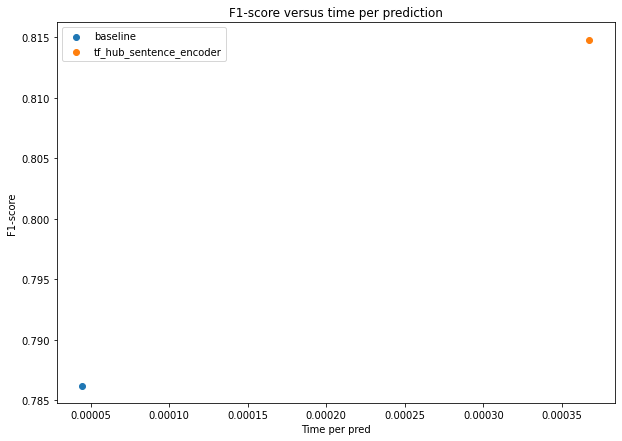

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1_score"], label = "baseline")
plt.scatter(model_6_time_per_pred, model_6_pretrained_results["f1_score"], label = "tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per pred")
plt.ylabel("F1-score");